In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Load Excel file (change filename and sheet name if needed)
file_path = '/content/drive/MyDrive/Colab Notebooks/Final_Poster_Machine_Translation/Rating Translation 140 sentences/ACC-FLUENCY/Final_Dataset_Normalization.xlsx'
df = pd.read_excel(file_path)  # or use sheet_name='Sheet1' if needed

print(df.columns)
print(df.head)


Index(['Index', 'Source', 'Translation', 'Accuracy', 'Fluency'], dtype='object')
<bound method NDFrame.head of      Index                                             Source  \
0     1099  Temperatures remain below zero and roads are l...   
1     1097  Since this morning, the snowploughs have repor...   
2     1098  Besides certain snow-covered places, or some i...   
3      886  I was social before, now it is painful and sca...   
4      894                   Who fits the role better than I?   
..     ...                                                ...   
135    956  However, only same-sex beings will be on the B...   
136   2361  After the police officer found marijuana in th...   
137    200           However, she had told me I was finished!   
138   1538  For the library, the fabric was - for the firs...   
139   1542  These provide atmosphere, but most importantly...   

                                           Translation  Accuracy  Fluency  
0    Les temperatures es mantene

In [4]:
import pandas as pd


# Normalize fluency and accuracy (assuming those are your column names)
df['Fluency_normalized'] = (df['Fluency'] - 1) / 6
df['Accuracy_normalized'] = (df['Accuracy'] - 1) / 6

# Compute the average
df['Average_normalized'] = (df['Fluency_normalized'] + df['Accuracy_normalized']) / 2

# Print the result
print(df[['Fluency', 'Accuracy', 'Fluency_normalized', 'Accuracy_normalized', 'Average_normalized']])

# Optionally save it back to Excel
df.to_excel('normalized_scores.xlsx', index=False)


     Fluency  Accuracy  Fluency_normalized  Accuracy_normalized  \
0          6         5            0.833333             0.666667   
1          5         6            0.666667             0.833333   
2          6         7            0.833333             1.000000   
3          5         6            0.666667             0.833333   
4          6         6            0.833333             0.833333   
..       ...       ...                 ...                  ...   
135        7         7            1.000000             1.000000   
136        5         6            0.666667             0.833333   
137        5         5            0.666667             0.666667   
138        6         7            0.833333             1.000000   
139        6         6            0.833333             0.833333   

     Average_normalized  
0              0.750000  
1              0.750000  
2              0.916667  
3              0.750000  
4              0.833333  
..                  ...  
135          

In [8]:
# Save the updated DataFrame to a new Excel file
output_path = '/content/drive/MyDrive/Colab Notebooks/Final_Poster_Machine_Translation/rating traducciones/normalized_scores.xlsx'
df.to_excel(output_path, index=False)

print("Normalized scores saved to:", output_path)

Normalized scores saved to: /content/drive/MyDrive/Colab Notebooks/Final_Poster_Machine_Translation/Rating Translation 140 sentences/ACC-FLUENCY/normalized_scores_weighted.xlsx


#PEARSON CORRELATION

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Load the Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/Final_Poster_Machine_Translation/rating traducciones/normalized_scores.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)

# Ensure the column names match exactly in your Excel file
comet_scores = df['comet_score']
human_assessments = df['Average_normalized']

# Compute Pearson correlation
correlation, p_value = pearsonr(comet_scores, human_assessments)

# Display results
print(f"Pearson correlation: {correlation:.4f}")
print(f"P-value: {p_value:.4e}")



Pearson correlation: 0.4548
P-value: 1.6515e-08


✅ Pearson correlation: 0.4548
This is a moderate positive correlation between the two variables:

A value of +1 would mean a perfect positive linear relationship.

A value of 0 means no linear relationship.

So, 0.4548 suggests a moderate tendency for higher COMET scores to be associated with higher human assessment scores.

✅ P-value: 1.6515e-08
This is extremely small (<< 0.05), meaning the correlation is statistically significant:

It strongly suggests that the observed correlation is not due to random chance.

In other words, there's strong evidence of a real relationship between the COMET scores and human assessments.

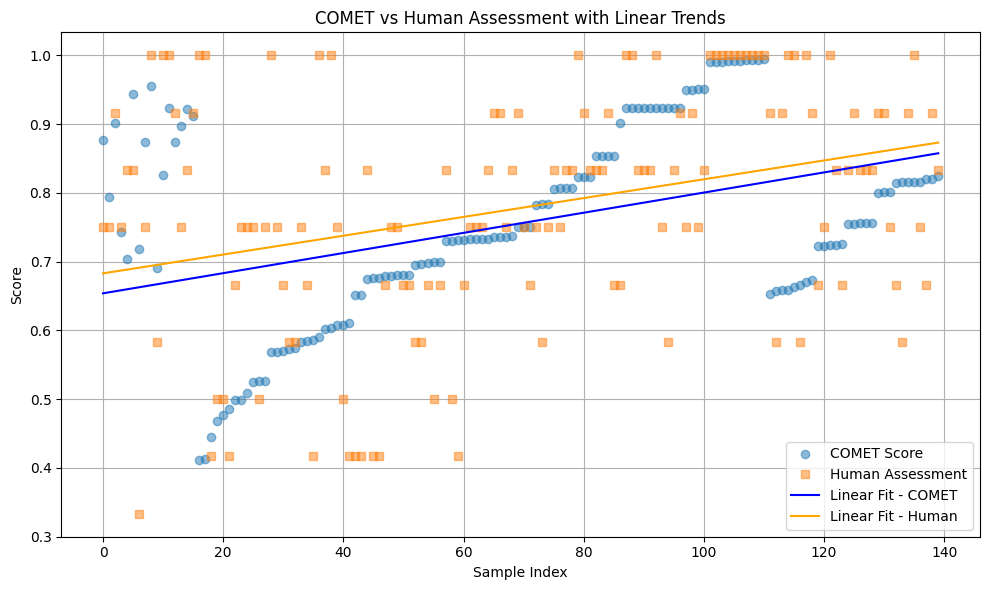

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your actual data
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Final_Poster_Machine_Translation/rating traducciones/normalized_scores.xlsx")

# Get x-axis (indices or sample numbers)
x = np.arange(len(df))

# Extract the columns
comet = df['comet_score']
human = df['Average_normalized']

# Fit linear regression (1st degree polynomial)
comet_fit = np.polyfit(x, comet, 1)
human_fit = np.polyfit(x, human, 1)

# Generate regression lines
comet_line = np.poly1d(comet_fit)(x)
human_line = np.poly1d(human_fit)(x)

# Plot original scores and their linear trends
plt.figure(figsize=(10, 6))
plt.plot(x, comet, 'o', label='COMET Score', alpha=0.5)
plt.plot(x, human, 's', label='Human Assessment', alpha=0.5)
plt.plot(x, comet_line, '-', label='Linear Fit - COMET', color='blue')
plt.plot(x, human_line, '-', label='Linear Fit - Human', color='orange')

plt.title('COMET vs Human Assessment with Linear Trends')
plt.xlabel('Sample Index')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



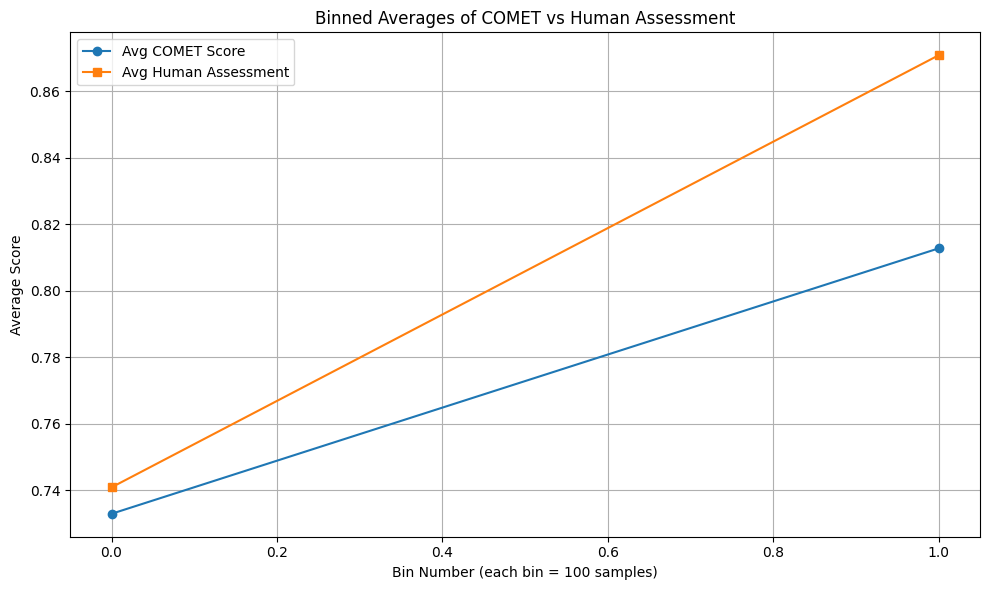

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Choose bin size (e.g., average every 10 samples)
bin_size = 100
num_bins = len(df) // bin_size

# Group by bin and compute mean
df['bin'] = df.index // bin_size
binned = df.groupby('bin')[['comet_score', 'Average_normalized']].mean()

# Plot the averaged values
plt.figure(figsize=(10, 6))
plt.plot(binned.index, binned['comet_score'], marker='o', linestyle='-', label='Avg COMET Score')
plt.plot(binned.index, binned['Average_normalized'], marker='s', linestyle='-', label='Avg Human Assessment')

plt.title('Binned Averages of COMET vs Human Assessment')
plt.xlabel(f'Bin Number (each bin = {bin_size} samples)')
plt.ylabel('Average Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#SPEARMAN CORRELATION

In [ ]:
from scipy.stats import spearmanr

spearman_corr, _ = spearmanr(df['comet_score'], df['Average_normalized'])
print("Spearman Correlation:", spearman_corr)


Spearman Correlation: 0.4636812412657105
